In [1]:
from stingray import lightcurve
import numpy as np
from stingray.bispectrum import Bispectrum
from scipy.io import loadmat, savemat 
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

C:\Users\tkalra\AppData\Local\Continuum\anaconda3\lib\site-packages\stingray\crossspectrum.py:21: UserWarning: Using standard scipy fft
  warnings.warn("Using standard scipy fft")


In [2]:
# 1. Read a time stacked image.. with vertical axis as distance and horizontal axis of time - currently done manually 
matstack = loadmat('bispectra_vspec_MI.mat') #,'f_FI','fv_post_FI','fv_neg_FI')
                  
#xx = matstack['f_FI']
#times=1/xx 
dt=   0.003906250000000  ; # bandwidth

#freq = 1 #Hz
exposure = 1  # seconds
times = np.arange(0, exposure, dt)  # seconds
times=matstack['f_MI']
counts= matstack['fv_neg_MI']
#print(times)


times=np.squeeze(times)
counts=np.squeeze(counts)
#print(np.size(times))

#print(np.type(counts))
#Sv  = matstack['Sv_subset']

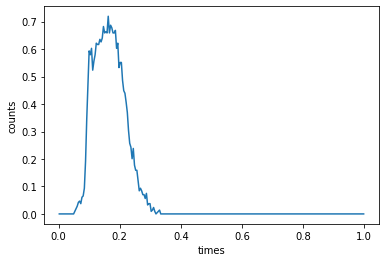

In [3]:

#times = np.arange(1,11)
#counts = np.array([2, 1, 3, 4, 2, 5, 1, 0, 2, 3])


lc = lightcurve.Lightcurve(times,counts)
print(lc)
lc.plot(labels=['times','counts'])

#lc.counts

In [4]:
window = 'hanning'

bs = Bispectrum(lc,maxlag=25,window = window, scale ='unbiased')
#bs = Bispectrum(lc)


In [5]:
bs.freq


array([-128.  , -122.88, -117.76, -112.64, -107.52, -102.4 ,  -97.28,
        -92.16,  -87.04,  -81.92,  -76.8 ,  -71.68,  -66.56,  -61.44,
        -56.32,  -51.2 ,  -46.08,  -40.96,  -35.84,  -30.72,  -25.6 ,
        -20.48,  -15.36,  -10.24,   -5.12,    0.  ,    5.12,   10.24,
         15.36,   20.48,   25.6 ,   30.72,   35.84,   40.96,   46.08,
         51.2 ,   56.32,   61.44,   66.56,   71.68,   76.8 ,   81.92,
         87.04,   92.16,   97.28,  102.4 ,  107.52,  112.64,  117.76,
        122.88,  128.  ])

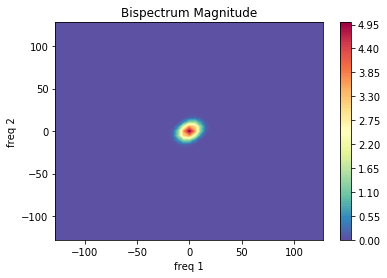

In [6]:
p = bs.plot_mag()
p.show()

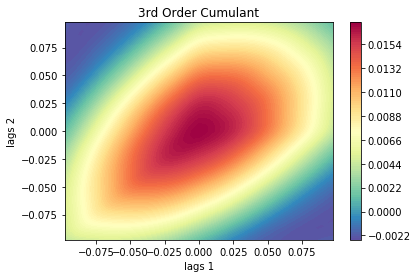

In [7]:
p = bs.plot_cum3()


In [12]:
# find the sum of elements under the principal diagonal
# along principal diagonal 
A=bs.cum3
upper_sum = np.triu(A).sum()-np.trace(A)
lower_sum = np.tril(A).sum()-np.trace(A)
print(lower_sum)

9.074009486681927


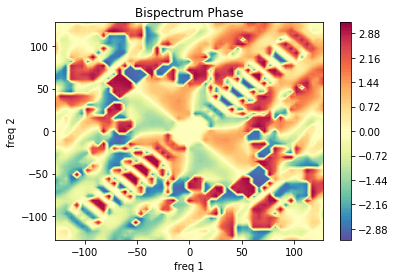

In [8]:
p = bs.plot_phase()


In [9]:
bi_mag=bs.bispec_mag[1]
sum_bispec_mag=np.sum(bi_mag)
print(np.size(bi_mag))

51


In [10]:
print(sum_bispec_mag)

0.004127511940450568


In [11]:
#(bs.cum3)
print(np.shape(bs.cum3))
sum_cum_bs=np.sum(cum_bs)
print(sum_cum_bs)
print(np.size(bs.cum3))

(51, 51)


NameError: name 'cum_bs' is not defined